<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/COVID_19_VACCINATIONS_PROGRESS_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import librabries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
# Read the country_vaccinations dataset
vcn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/country_vaccinations.csv")
# Read the country_vaccinations_by_manufacturer dataset
vbm = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/country_vaccinations_by_manufacturer.csv")
# Read the 2021_population dataset
wp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/2021_population.csv")

In [32]:
# Call out the first 5 rows of the dataset
vcn.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0,0,nan,nan,nan,0,0,nan,nan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,1367,nan,nan,nan,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,1367,nan,nan,nan,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,1367,nan,nan,nan,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,1367,nan,nan,nan,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [33]:
# Dataset information
vcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              39113 non-null  object 
 1   iso_code                             39113 non-null  object 
 2   date                                 39113 non-null  object 
 3   total_vaccinations                   21551 non-null  float64
 4   people_vaccinated                    20604 non-null  float64
 5   people_fully_vaccinated              17728 non-null  float64
 6   daily_vaccinations_raw               17713 non-null  float64
 7   daily_vaccinations                   38855 non-null  float64
 8   total_vaccinations_per_hundred       21551 non-null  float64
 9   people_vaccinated_per_hundred        20604 non-null  float64
 10  people_fully_vaccinated_per_hundred  17728 non-null  float64
 11  daily_vaccinations_per_milli

In [34]:
# Count the number of countries in the dataset
vcn['country'].nunique()

222

In [35]:
#2.2. Counttry_vaccinations_by_manufacturers:

# Call out the first 5 rows of the dataset
vbm.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31096
4,Austria,2021-01-15,Johnson&Johnson,0


In [36]:
# Dataset information
vbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12477 entries, 0 to 12476
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            12477 non-null  object
 1   date                12477 non-null  object
 2   vaccine             12477 non-null  object
 3   total_vaccinations  12477 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 390.0+ KB


In [37]:
vbm['location'].nunique()

35

In [38]:
#2.3. World_population dataset:

# Call out the first 5 rows of the dataset
wp.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,444,712,023","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,394,784,323","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,114,077","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"276,653,405","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"225,639,396","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [39]:
# Dataset infomartion
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iso_code           228 non-null    object
 1   country            228 non-null    object
 2   2021_last_updated  228 non-null    object
 3   2020_population    228 non-null    object
 4   area               228 non-null    object
 5   density_sq_km      228 non-null    object
 6   growth_rate        228 non-null    object
 7   world_%            228 non-null    object
 8   rank               228 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 16.2+ KB


In [40]:
wp['country'].nunique()

228

In [41]:
wp_sort = wp[['country', '2021_last_updated']] 
wp_sort.sort_values('country') 
vcn_drop = vcn.drop_duplicates('country', keep = "last") 
vcn_sort = vcn_drop[['country', 'people_fully_vaccinated']]
df_same = pd.concat([wp_sort,vcn_sort]) 
df_same = df_same[df_same.groupby('country').country.transform(len) > 1] 
df_same = df_same.drop_duplicates('country', keep = "last") 
df_same_sort = df_same[['country', 'people_fully_vaccinated']] 
df_same_sort = df_same_sort.rename(columns={'country' : 'country_vaccinations'}) 
df_same_sort.reset_index(drop=True, inplace=True) 
wp_clean = pd.concat([wp, df_same])
wp_clean = wp_clean[wp_clean.groupby('country').country.transform(len) > 1]
wp_clean = wp_clean.drop_duplicates('country', keep = "first")
wp_clean_sort = wp_clean[['country', '2021_last_updated']]
wp_clean_sort = wp_clean_sort.sort_values('country')
wp_clean_sort.reset_index(drop = True, inplace=True)
cbn = pd.concat([wp_clean_sort, df_same_sort], axis=1)
cbn

,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
0,Afghanistan,"39,929,284",Afghanistan,nan
1,Albania,"2,872,370",Albania,575342
2,Algeria,"44,694,125",Algeria,724812
3,Andorra,"77,355",Andorra,40616
4,Angola,"34,043,709",Angola,728311
...,...,...,...,...
186,Venezuela,"28,728,962",Venezuela,nan
187,Vietnam,"98,253,611",Vietnam,1636372
188,Yemen,"30,558,838",Yemen,13322
189,Zambia,"18,975,907",Zambia,239152


In [42]:
cbn.isna().sum()

country                     0
2021_last_updated           0
country_vaccinations        0
people_fully_vaccinated    19
dtype: int64

In [43]:
cbn = cbn.dropna()
cbn = cbn.reset_index()
cbn

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
0,1,Albania,"2,872,370",Albania,575342
1,2,Algeria,"44,694,125",Algeria,724812
2,3,Andorra,"77,355",Andorra,40616
3,4,Angola,"34,043,709",Angola,728311
4,5,Anguilla,"15,117",Anguilla,8965
...,...,...,...,...,...
167,185,Vanuatu,"315,214",Vanuatu,1721
168,187,Vietnam,"98,253,611",Vietnam,1636372
169,188,Yemen,"30,558,838",Yemen,13322
170,189,Zambia,"18,975,907",Zambia,239152


In [44]:
# Check data types
cbn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    172 non-null    int64  
 1   country                  172 non-null    object 
 2   2021_last_updated        172 non-null    object 
 3   country_vaccinations     172 non-null    object 
 4   people_fully_vaccinated  172 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.8+ KB


In [45]:
# Reformat data type
cbn.replace(',','', regex=True, inplace=True)
cbn['2021_last_updated'] = cbn['2021_last_updated'].map(lambda x: float(x))
cbn['people_fully_vaccinated'] = cbn['people_fully_vaccinated'].map(lambda x: float(x))
cbn

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
0,1,Albania,2872370,Albania,575342
1,2,Algeria,44694125,Algeria,724812
2,3,Andorra,77355,Andorra,40616
3,4,Angola,34043709,Angola,728311
4,5,Anguilla,15117,Anguilla,8965
...,...,...,...,...,...
167,185,Vanuatu,315214,Vanuatu,1721
168,187,Vietnam,98253611,Vietnam,1636372
169,188,Yemen,30558838,Yemen,13322
170,189,Zambia,18975907,Zambia,239152


In [46]:
# Check weird data
cbn[cbn['2021_last_updated'] < cbn['people_fully_vaccinated']]

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
62,65,Gibraltar,33698,Gibraltar,39174


In [47]:
# Remove weird data 
cbn = cbn.drop(index = [61])

In [48]:
#Five Highest Countries
total = vcn.groupby('country')['total_vaccinations'].max().reset_index()
fhc = total.sort_values('total_vaccinations', ascending=False).head(5)
pd.set_option('display.float_format', lambda x: '%.0f'% x)
fhc

,country,total_vaccinations
40,China,1935869000
90,India,576365820
211,United States,361684564
27,Brazil,173650317
99,Japan,115739998


In [49]:
fig = px.bar(fhc, 
             x='country', 
             y='total_vaccinations',
             labels = {'country' : 'Country', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Top 5 Countries With Biggest Vaccinations Progress"
            )
fig.show()

In [50]:
# Top 5 smallest countries with vaccinations progress
flc = total.sort_values('total_vaccinations', ascending=False).tail(5)
flc

,country,total_vaccinations
66,Falkland Islands,4407
131,Montserrat,2828
144,Niue,2406
199,Tokelau,968
157,Pitcairn,83


In [51]:
fig = px.bar(flc, 
             x='country', 
             y='total_vaccinations',
             labels = {'country' : 'Country', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Top 5 Countries With Lowest Vaccinations Progress"
            )
fig.show()

In [52]:
# Find the outliers which have far higher total vaccinations than the general status
pd.set_option('display.float_format', lambda x: '%.0f'% x)
tvc = total.sort_values('total_vaccinations', ascending=False)
Q1 = tvc['total_vaccinations'].quantile(0.25)
Q3 = tvc['total_vaccinations'].quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

In [53]:
tvc[(Lower > tvc['total_vaccinations']) | (tvc['total_vaccinations'] > Upper)].reset_index()

,index,country,total_vaccinations
0,40,China,1935869000
1,90,India,576365820
2,211,United States,361684564
3,27,Brazil,173650317
4,99,Japan,115739998
5,74,Germany,99340944
6,210,United Kingdom,89070370
7,203,Turkey,88443350
8,91,Indonesia,88197072
9,69,France,82917669


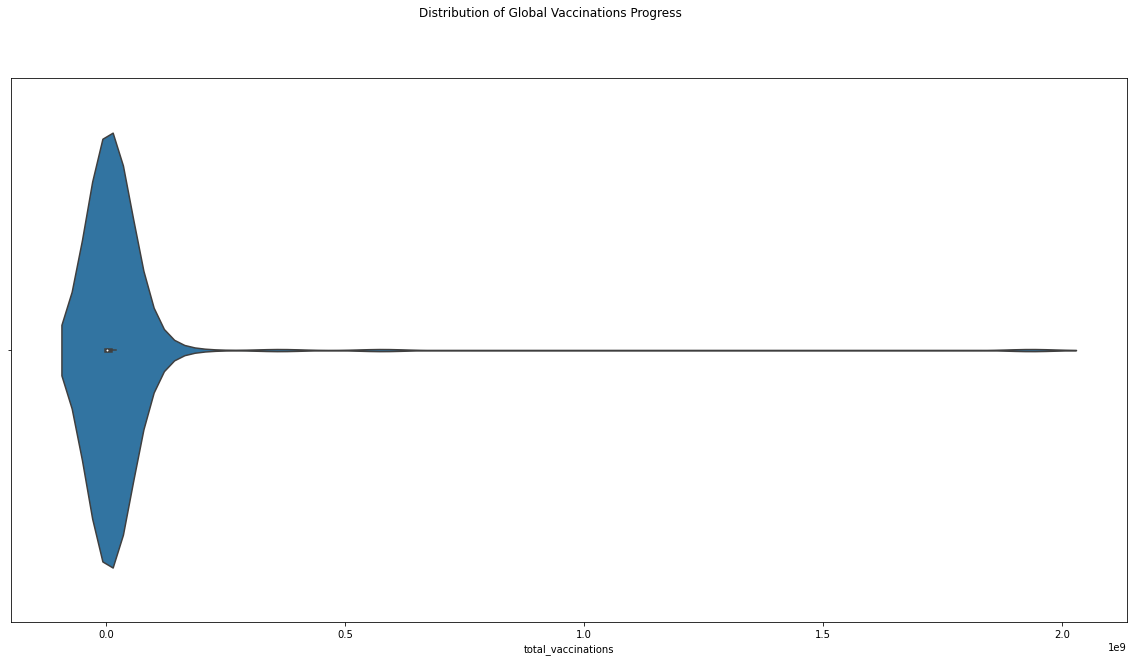

In [54]:
#Using violinplot provided a clearer view of the distribution.

plt.figure(figsize=(20,10))
plt.suptitle("Distribution of Global Vaccinations Progress")
sns.violinplot(data = total,
            x = 'total_vaccinations',
              showmedians=True,
              showmeans=True)
plt.show()

In [57]:
# Find the global average total vaccinations by month
vcn['date'] = pd.to_datetime(vcn['date'])
avg = vcn.groupby(vcn['date'].dt.strftime('%B'))['daily_vaccinations'].mean().sort_values().reset_index()
avg

,date,daily_vaccinations
0,December,24175
1,January,45169
2,February,55463
3,March,67820
4,April,92470
5,May,125572
6,July,162779
7,June,178642
8,August,215679


In [58]:
avg = avg.reindex([0, 1, 2, 3, 4, 5, 7, 6, 8])
avg

,date,daily_vaccinations
0,December,24175
1,January,45169
2,February,55463
3,March,67820
4,April,92470
5,May,125572
7,June,178642
6,July,162779
8,August,215679


In [59]:
# Lineplot to see the full progress
fig = px.line(avg, 
             x='date', 
             y='daily_vaccinations',
             labels = {'daily_vaccinations' : 'Global Monthly Vaccinations', 'date' : 'Month'},
             title = "Average Total Vaccinations"
            )
fig.show()

In [60]:
# Call out the number of total vaccines used by country and vaccine types
vpc = vbm.groupby(['vaccine', 'location'])['total_vaccinations'].max().reset_index()
vpc

,vaccine,location,total_vaccinations
0,CanSino,Chile,515836
1,Johnson&Johnson,Austria,230542
2,Johnson&Johnson,Belgium,337333
3,Johnson&Johnson,Bulgaria,112434
4,Johnson&Johnson,Croatia,59920
...,...,...,...
127,Sinovac,Chile,19049522
128,Sinovac,Hong Kong,2645923
129,Sinovac,Uruguay,3242607
130,Sputnik V,Hungary,1798288


In [61]:
# Rank the popularity of vaccines
vr = vpc.groupby('vaccine')['total_vaccinations'].sum().reset_index()
vr = vr.sort_values('total_vaccinations', ascending=False)
vr

,vaccine,total_vaccinations
4,Pfizer/BioNTech,686904224
2,Moderna,206941323
3,Oxford/AstraZeneca,83312521
1,Johnson&Johnson,28253742
6,Sinovac,24938052
5,Sinopharm/Beijing,2081012
7,Sputnik V,1836235
0,CanSino,515836


In [62]:
# Pieplot
fig = px.pie(vr, values='total_vaccinations', names='vaccine', title='Vaccines Occupancy' )
fig.show()

In [63]:
# Barplot
fig = px.bar(vr, 
             y='total_vaccinations', 
             x='vaccine',
             labels = {'vaccine' : 'Vaccines', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Overview of Vaccines"
            )
fig.show()

In [64]:
# Creat pivot table
pvt = pd.pivot_table(data = vbm, index = ['location'], columns = ['vaccine'], values = 'total_vaccinations', aggfunc = 'max')
pvt.fillna(0) # Fill null values by 0 to have a better view of the table

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
location,,,,,,,,
Austria,0,230542,997272,1583364,7163680,0,0,0
Belgium,0,337333,1287377,2816588,10555461,0,0,0
Bulgaria,0,112434,269269,477025,1298259,0,0,0
Chile,515836,0,0,476200,6948017,0,19049522,0
Croatia,0,59920,309999,543862,2247795,0,0,0
Cyprus,0,19178,80799,251888,692920,0,0,0
Czechia,0,183951,884680,875557,9257187,0,0,0
Denmark,0,47950,983359,154581,6595140,0,0,0
Estonia,0,43933,114364,236405,816769,0,0,0


In [65]:
# Find rate
pd.reset_option('display.float_format') # Re-format to get float values
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set number of figure after doc
cbn['percentage'] = ((cbn['people_fully_vaccinated'])/(cbn['2021_last_updated']))*100 # Set percentage value under % type
cbn

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated,percentage
0,1,Albania,2872370.00,Albania,575342.00,20.03
1,2,Algeria,44694125.00,Algeria,724812.00,1.62
2,3,Andorra,77355.00,Andorra,40616.00,52.51
3,4,Angola,34043709.00,Angola,728311.00,2.14
4,5,Anguilla,15117.00,Anguilla,8965.00,59.30
...,...,...,...,...,...,...
167,185,Vanuatu,315214.00,Vanuatu,1721.00,0.55
168,187,Vietnam,98253611.00,Vietnam,1636372.00,1.67
169,188,Yemen,30558838.00,Yemen,13322.00,0.04
170,189,Zambia,18975907.00,Zambia,239152.00,1.26


In [66]:
#Top 5 countries with highest vaccinations rate per population:

tfh = cbn.sort_values('percentage', ascending=False).head(5)
tfh

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated,percentage
62,65,Gibraltar,33698.00,Gibraltar,39174.00,116.25
97,106,Malta,442934.00,Malta,408885.00,92.31
73,76,Iceland,343578.00,Iceland,255322.00,74.31
31,32,Cayman Islands,66497.00,Cayman Islands,48847.00,73.46
139,152,Singapore,5901638.00,Singapore,4329835.00,73.37


In [67]:
# Top 5 countries with lowest vaccinations rate per population:

cbn.sort_values('percentage').head(5)

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated,percentage
69,72,Haiti,11555977.00,Haiti,1399.00,0.01
145,159,South Sudan,11400885.00,South Sudan,4763.00,0.04
169,188,Yemen,30558838.00,Yemen,13322.00,0.04
33,34,Chad,16965252.00,Chad,11865.00,0.07
26,27,Burkina Faso,21558166.00,Burkina Faso,17696.00,0.08


In [68]:
# Scatterplot
fig = px.scatter(cbn, 
                y="2021_last_updated", 
                x="percentage",
                labels = {'2021_last_updated' : 'Population', 'percentage' : 'Percentage'},
                title = "Scatterplot"
               )
fig.show()

In [69]:
# Find quantile range and select normal values
pd.set_option('display.float_format', lambda x: '%.0f'% x)
cbn = cbn.sort_values('2021_last_updated', ascending=False)
qt1 = cbn['2021_last_updated'].quantile(0.25) # Quantile 1
qt3 = cbn['2021_last_updated'].quantile(0.75) # Quantile 3
IQR_cbn = qt3 - qt1 # Quantile range
Upper_cbn = qt3 + 1.5*IQR_cbn # Upper whisker
Lower_cbn = qt1 - 1.5*IQR_cbn # Lower whisker 
cbn_sort = cbn[(Lower_cbn < cbn['2021_last_updated']) & (cbn['2021_last_updated'] < Upper_cbn)].reset_index()

In [70]:
# Scatter plot for normal values
fig = px.scatter(cbn_sort, 
                y="2021_last_updated", 
                x="percentage",
                labels = {'2021_last_updated' : 'Population', 'percentage' : 'Percentage'},
                title = "Scatterplot excluding outliers"
               )
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')